<a href="https://colab.research.google.com/github/abhaysrivastav/Pytorch/blob/master/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.nn import Linear


In [2]:
torch.manual_seed(1)
model =  Linear(in_features=1 , out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [3]:
x = torch.tensor([[2.0], [3.0]])
print(model(x))

tensor([[0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


**Custom Linear Models**

---



---



In [0]:
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'y')

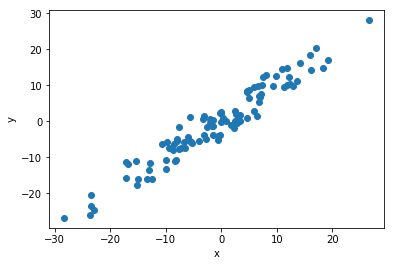

In [3]:
X = torch.randn(100, 1)*10
Y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), Y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred =  self.linear(x)
    return pred 


In [5]:
torch.manual_seed(1)
model1 =  LR(1, 1)
#print(list(model1.parameters()))
print(model1)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
#x = torch.tensor([[1.0], [2.0]])
#print(model1.forward(x))

In [0]:
[w, b] = model1.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y)
  plt.show()

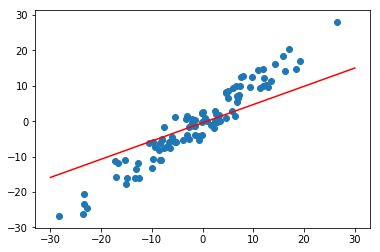

In [8]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr = 0.001)

In [14]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model1.forward(X)
  loss = criterion(y_pred, Y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.9841973751822418e+18
epoch: 1 loss: 1.2024527167317606e+18
epoch: 2 loss: 7.2870394264866e+17
epoch: 3 loss: 4.4160527319957504e+17
epoch: 4 loss: 2.6761924041506816e+17
epoch: 5 loss: 1.6218116055262822e+17
epoch: 6 loss: 9.828416758585754e+16
epoch: 7 loss: 5.95616400932864e+16
epoch: 8 loss: 3.609521868819661e+16
epoch: 9 loss: 2.1874229783822336e+16
epoch: 10 loss: 1.3256103026491392e+16
epoch: 11 loss: 8033391119171584.0
epoch: 12 loss: 4868352409337856.0
epoch: 13 loss: 2950292760952832.0
epoch: 14 loss: 1787920528703488.0
epoch: 15 loss: 1083506096603136.0
epoch: 16 loss: 656620505792512.0
epoch: 17 loss: 397921606434816.0
epoch: 18 loss: 241146324320256.0
epoch: 19 loss: 146138191626240.0
epoch: 20 loss: 88561890099200.0
epoch: 21 loss: 53669798084608.0
epoch: 22 loss: 32524688424960.0
epoch: 23 loss: 19710435393536.0
epoch: 24 loss: 11944812609536.0
epoch: 25 loss: 7238732218368.0
epoch: 26 loss: 4386777464832.0
epoch: 27 loss: 2658451324928.0
epoch: 28 loss: 

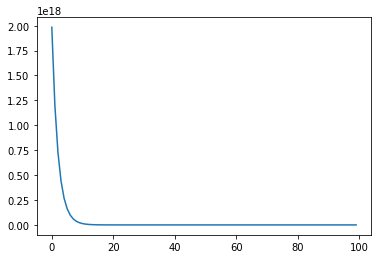

In [15]:
plt.plot(range(epochs), losses)

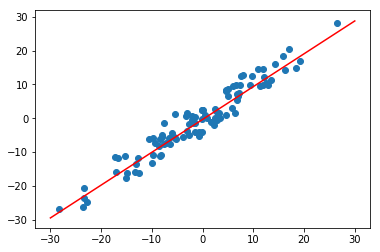

In [16]:
plot_fit("Training Model")